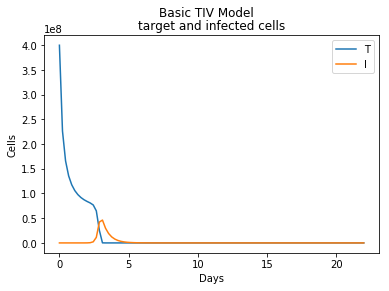

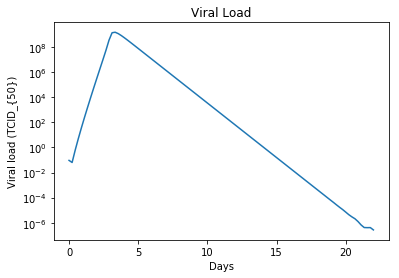

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
pV = 210; 
beta = 5e-7; 
betap = 3e-8;
V0 = 1e+4; 
I0 = 0
T0 = 7e+7; 
gT = 0.8;
deltaV = 5; 
deltaI = 2;

time = np.linspace(0,22,100)
y_init = [4e+8, 0, 9.3e-2]

# TIV differential equations
def TIV(t, y): 
    T,I,V = y
    return [gT * T * (1 - (T+1)/T0) - (betap * V * T), 
            betap * T * V - (deltaI * I), 
            pV * I - (deltaV * V) - (beta * V * T)]

# Solve TIV
sol = solve_ivp(TIV, [time[0], time[-1]], y_init, method = 'RK45', t_eval = time)

# Plot
fig1, ax1 = plt.subplots()
fig1.suptitle("Basic TIV Model")

ax1.plot(sol.t,sol.y[0],sol.t,sol.y[1])
ax1.set_title("target and infected cells")
ax1.set_xlabel("Days")
ax1.set_ylabel("Cells")
ax1.legend(('T','I'))

fig1, ax2 = plt.subplots()
ax2.plot(sol.t,sol.y[2])
ax2.set_title('Viral Load')
ax2.set_xlabel("Days")
ax2.set_ylabel("Viral load (TCID_{50})")
ax2.set_yscale('log')


plt.show()

In [20]:
# Vary parameters
Z_len = 5
beta_values = np.linspace(1e-7, 5e-7, Z_len)

pV_values = np.linspace(100, 200, Z_len)

# Create storage array for AUC values
AUC_vals = np.zeros((Z_len, Z_len))

# Nested for loop to find AUC when varying two different parameters (beta and pV)
for i in beta_values:
    beta = i
    for j in pV_values:
        pV = j
        
        # TIV differential equations
        def TIV(t, y): 
        T,I,V = y
        return [gT * T * (1 - (T+1)/T0) - (betap * V * T), 
                betap * T * V - (deltaI * I), 
                pV * I - (deltaV * V) - (beta * V * T)]

        # Solve TIV
        sol = solve_ivp(TIV, [time[0], time[-1]], y_init, method = 'RK45', t_eval = time)
        
        # Solve and store AUC
        AUC_vals[i, j] = np.trapz(sol.y[2], sol.t)
        
    

In [ ]:
Surface plot

Define matrix (set aside memory space)

store in array (matrix with x, y, z)
AUC = np.array zeros(m, n)

nested for loop 
for i in 1=m:
    for i in j in 1 = row:
        simulate model (Xidv and Yindv)
        
        AUC = matrix(m,n)
        for i in 1 = length of X:
            for j in 1 = length of Y:
                Xnew = X(i)
                Ynew = Y(j)
                sol = Simulate model
                AUC(i, j) = (sol)
        store value in array

        x = np.linspace(a, b, N)
        y = np.linspace(a, b, N)